## HARSHIT KUMAR            Enrollment number: 23118034
## METALLURGY

## About the Dataset

The data in this dataset has been collected from a restaurant over a period of time. Each entry represents a unique transaction, capturing details about the bill amount, tip given, the gender of the person paying, smoking preference, day of the week, time of day, and the size of the dining party. This dataset can be used to analyze tipping behavior and understand the factors that influence the amount of tip given. Potential analyses include examining the relationship between the total bill and tip amount, exploring differences in tipping behaviour based on gender or smoking preference, and studying how the day of the week or time of day impacts tips. This data is useful for restaurateurs, economists, and social scientists interested in consumer behaviour.


Here's a description of each column in the dataset: 

 
1.total_bill: The total bill amount, including the cost of food and drink 2. .

tip: The tip amount given by the custo 3. er.

sex: The gender of the customer (e.g., Male or Fe 4. ale).

smoker: Whether the customer is a smoker or not (e.g., Yes 5. or No).

day: The day of the week when the transaction occurred (e.g., Sun, Sat, T 6. u, etc.).

time: The time of day when the transaction occurred, typically categorized as Lunc 7.  or Dinner.

size: The size of the party or grou of customers.


In [16]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder



In [17]:
df=pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Exploratory Data Analysis

In [18]:
df.shape

(244, 7)

In [19]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [20]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [22]:
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [23]:
#Check for duplications
df.duplicated().sum()

1

In [24]:
#remove duplicate rows
df[df.duplicated(keep=False)]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [25]:
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["day"].unique())
print(df["time"].unique())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


## Data Visualization

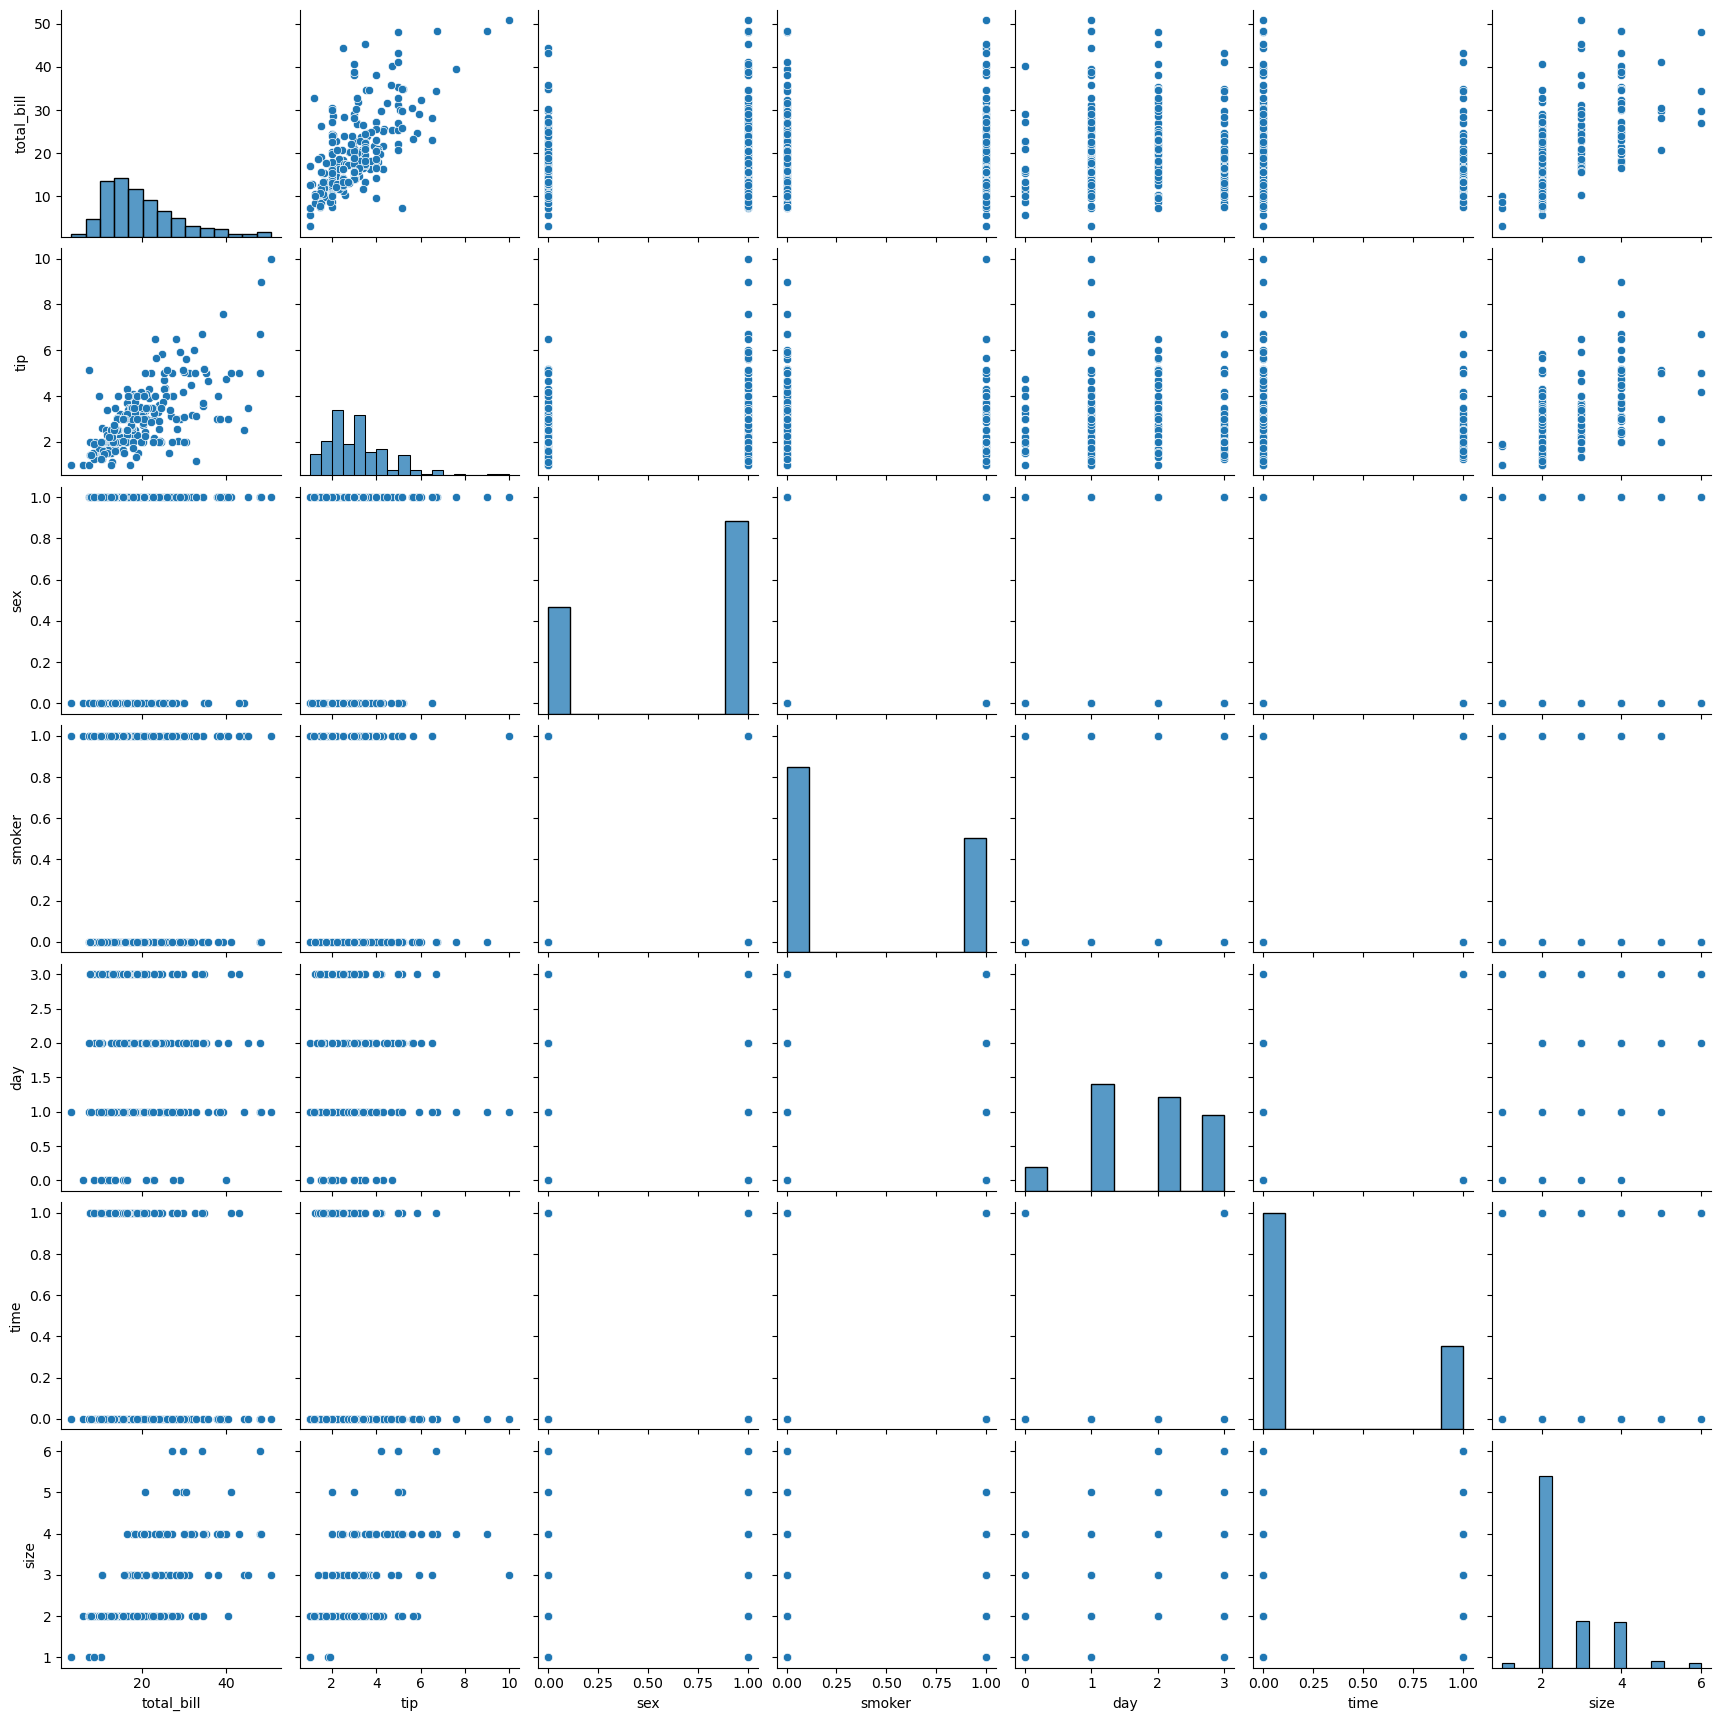

In [40]:
sns.pairplot(df)
plt.show()

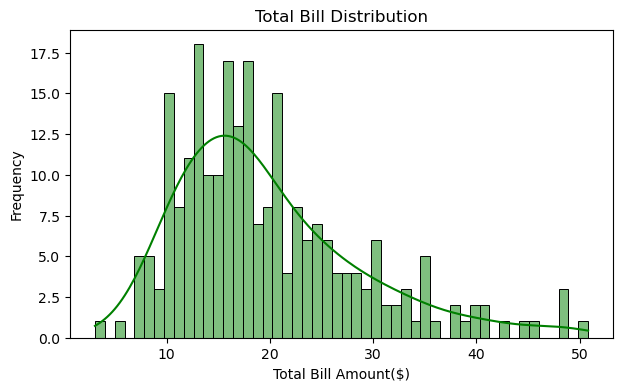

In [41]:
plt.figure(figsize=(7, 4))
sns.histplot(df["total_bill"], kde=True, bins=50,color='green')
plt.title("Total Bill Distribution")
plt.xlabel("Total Bill Amount($)")
plt.ylabel("Frequency")
plt.show()

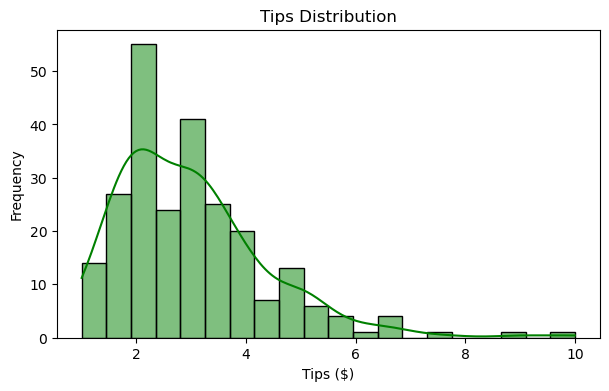

In [27]:
plt.figure(figsize=(7, 4))
sns.histplot(df["tip"], kde=True, bins=20,color='green')
plt.title("Tips Distribution")
plt.xlabel("Tips ($)")
plt.ylabel("Frequency")
plt.show()

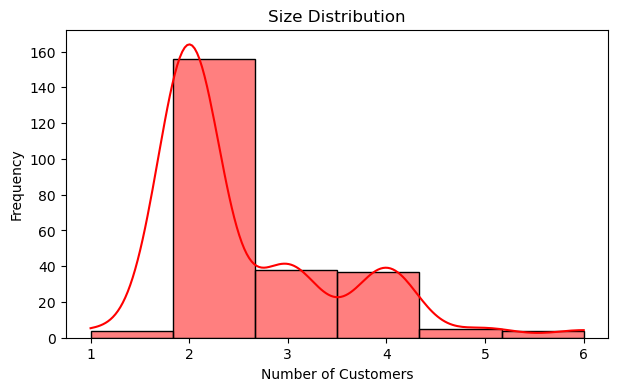

In [28]:
plt.figure(figsize=(7, 4))
sns.histplot(df["size"], kde=True, bins=6,color='red')
plt.title("Size Distribution")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.show()

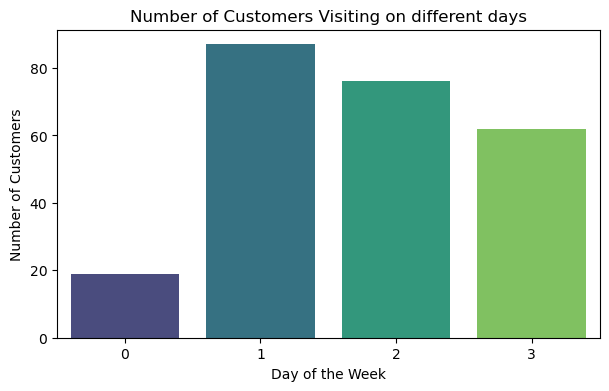

In [43]:
plt.figure(figsize=(7, 4))
sns.countplot(x='day', data=df, palette='viridis')
plt.title("Number of Customers Visiting on different days")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()

From the above data we can see that
Weekends are busier than weekdays

Positive relation between total bill amount and tips received

Size of customer have very weak relation to both total bill amount and tips received

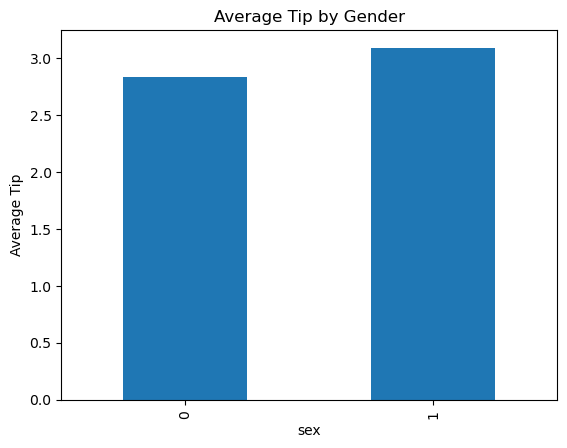

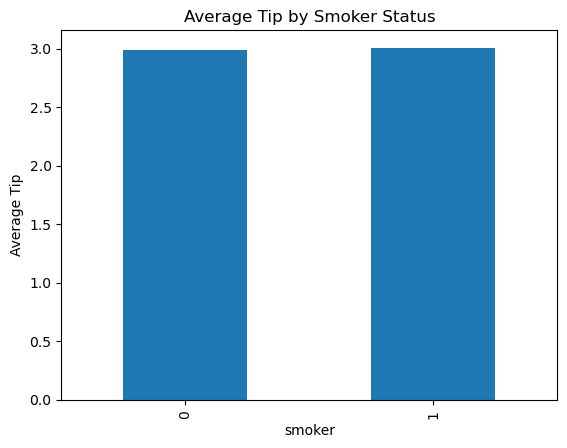

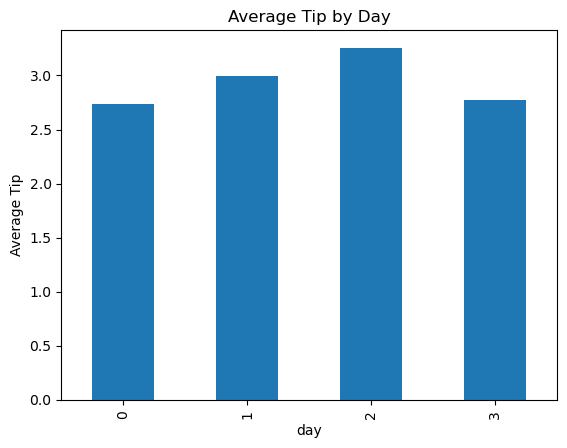

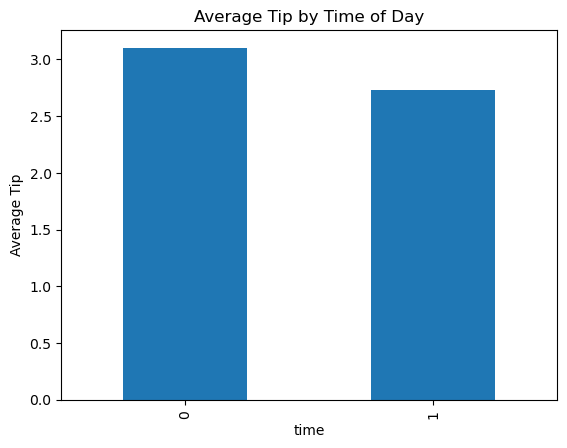

In [44]:
df.groupby('sex')['tip'].mean().plot(kind='bar', title='Average Tip by Gender', ylabel='Average Tip')
plt.show()

df.groupby('smoker')['tip'].mean().plot(kind='bar', title='Average Tip by Smoker Status', ylabel='Average Tip')
plt.show()

df.groupby('day')['tip'].mean().plot(kind='bar', title='Average Tip by Day', ylabel='Average Tip')
plt.show()

df.groupby('time')['tip'].mean().plot(kind='bar', title='Average Tip by Time of Day', ylabel='Average Tip')
plt.show()

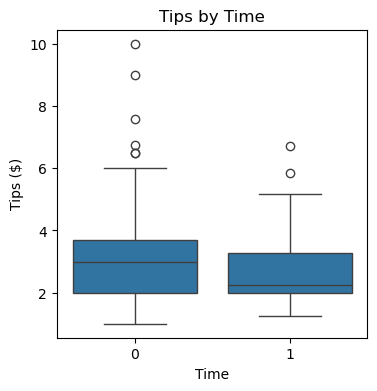

In [45]:
plt.figure(figsize=(4, 4))
sns.boxplot(x="time", y="tip", data=df)
plt.title("Tips by Time")
plt.xlabel("Time")
plt.ylabel("Tips ($)")
plt.show()

Tips received during dinner are generally higher also having wide range compared to that during lunch time

In [46]:
import plotly.express as px
 
fig1 = px.sunburst(df, path = ["sex", "size"])
fig1.update_traces(textinfo = "label + percent parent")
fig1.update_layout(title_text = "Customer's Gender by Size",
                  titlefont = {'size' : 25, 'family' : 'Serif'},
                  width = 400, height = 400)
fig1.show()

fig2 = px.sunburst(df, path = ["day", "time"])
fig2.update_traces(textinfo = "label + percent parent")
fig2.update_layout(title_text = "Customer's Time to eat",
                  titlefont = {'size' : 15, 'family' : 'Serif'},
                  width = 400, height = 400)
fig2.show()

1) Two members are most and then male customers came with three people and female ones did with two people.
2) On weekend, they had only dinner.
3) 
On Friday, they did eat dinner more than lunch, but most of them did lunch on Thursday.¶

In [47]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['day'] = LabelEncoder().fit_transform(df['day'])
df['time'] = LabelEncoder().fit_transform(df['time'])
df_corr = df.corr()
df_corr["tip"].sort_values(ascending = False)

tip           1.000000
total_bill    0.675734
size          0.489299
sex           0.088862
smoker        0.005929
day          -0.011548
time         -0.121629
Name: tip, dtype: float64

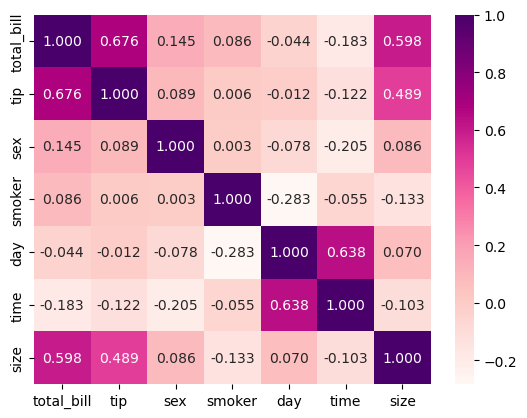

In [48]:
sns.heatmap(df_corr, fmt = ".3f", annot = True, cmap = "RdPu")
plt.show()

Only total bill and size( no of customers in group) correlated to the "tips" column to a considerable extent.
So, these two components are our principal components for model training.

#### So we can combine these two features into a single feature so that both of them can have theier natural impact on the model training.

# Model selection and training

In [49]:
df1=df.copy()
df1.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [50]:
# check which feature combination technique correlates the target variable the most
df1['features_combined']=(0.7*df1['total_bill'])+(0.3*df1['size']) #weighted according to their respective correlations
df1['bill_per_person'] = df1['total_bill'] / df1['size']
df1['bill_size_interaction'] = df1['total_bill'] * df1['size']
df1_corr = df1.corr()
df1_corr["tip"].sort_values(ascending = False)

tip                      1.000000
features_combined        0.679089
total_bill               0.675734
bill_size_interaction    0.644711
size                     0.489299
bill_per_person          0.347393
sex                      0.088862
smoker                   0.005929
day                     -0.011548
time                    -0.121629
Name: tip, dtype: float64

In [51]:
X= df1[['features_combined']] 
Y = df1['tip'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(195, 1)
(49, 1)


## Pairplot of all the variables we have used for model building

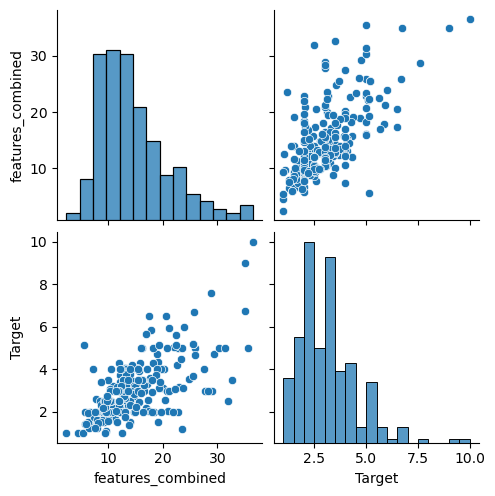

In [53]:
data = pd.concat([X, Y.rename('Target')], axis=1)
sns.pairplot(data)
plt.show()

## 1) General Linear Regression

In [54]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_linear = model.predict(X_test)
print( y_pred_linear.shape)

mae = mean_absolute_error(Y_test,y_pred_linear)
mse = mean_squared_error(Y_test, y_pred_linear)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print('Linear Regression R2:', r2_score(Y_test, y_pred_linear))



(49,)
Mean Absolute Error (MAE): 0.6273690149456385
Mean Squared Error (MSE): 0.5784491640274644
Linear Regression R2: 0.5372300603409277


## 2) Ridge Regression

In [55]:
ridge_reg = Ridge(alpha=500)
ridge_reg.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_ridge = ridge_reg.predict(X_test)

print('Ridge Regression R2:', r2_score(Y_test, y_pred_ridge))

Ridge Regression R2: 0.5428589662477314


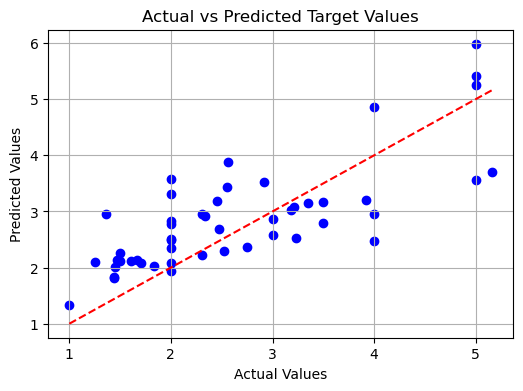

In [56]:
# Plot predicted vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(Y_test, y_pred_ridge, color='blue', marker='o')
# Add a line for perfect predictions (y = x line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Target Values')

# Show the plot
plt.grid(True)
plt.show()

## 3) Lasso Regression

In [57]:
lasso_reg = Lasso(alpha=0.45)
lasso_reg.fit(X_train, Y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(Y_test, y_pred_lasso))

Lasso Regression R2: 0.5432889734290021


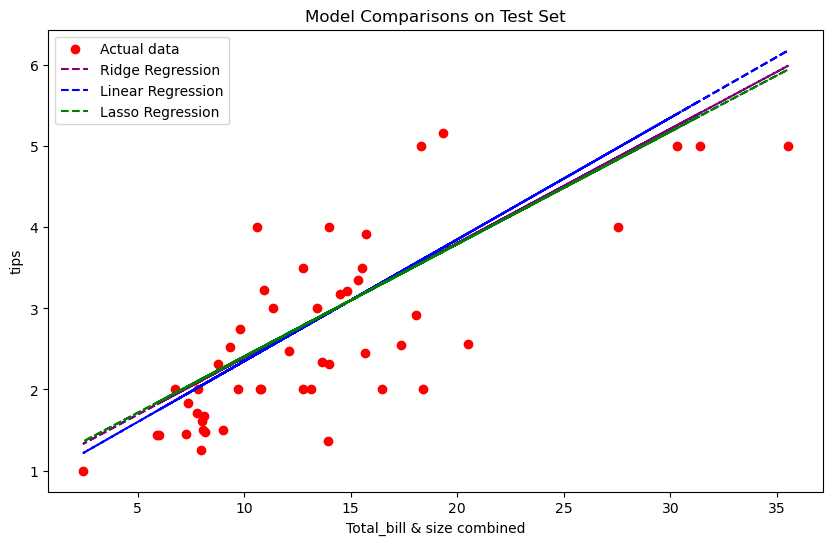

In [58]:
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')


plt.title('Model Comparisons on Test Set')
plt.xlabel('Total_bill & size combined')
plt.ylabel('tips')
plt.legend()
plt.show()

## 4) Decision Tree Regressor

In [61]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [62]:
tree_reg = DecisionTreeRegressor(max_depth=4,random_state=42)

df1['sex'] = LabelEncoder().fit_transform(df1['sex'])
df1['smoker'] = LabelEncoder().fit_transform(df1['smoker'])
df1['day'] = LabelEncoder().fit_transform(df1['day'])
df1['time'] = LabelEncoder().fit_transform(df1['time'])
x=df1.drop("tip",axis=1)
y=df1['tip']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
tree_reg.fit(x_train, y_train)

sorted_indices = x_test.iloc[:, 0].argsort() 
x_test_sorted = x_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]

y_pred_tree = tree_reg.predict(x_test)

print('Decision Tree R2:', r2_score(y_test,y_pred_tree))

Decision Tree R2: 0.25594578058308415


## 5)Random Forest Regressor

In [72]:
forest_reg = RandomForestRegressor(n_estimators=500, random_state=42)
forest_reg.fit(x_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(x_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.22767223848450502


## 6) Support Vector Regressor

In [64]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

svr_reg = SVR(kernel='rbf',C=1, epsilon=0.1, gamma='scale')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print("SVR R2:", r2_score(Y_test, y_pred_svr))



SVR R2: 0.5162263903395706


## 7: K-Nearest Neighbours

In [65]:
knn_reg = KNeighborsRegressor(n_neighbors=19)
knn_reg.fit(x_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(x_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.5056033513915072


NameError: name 'y_pred_forest_sorted' is not defined

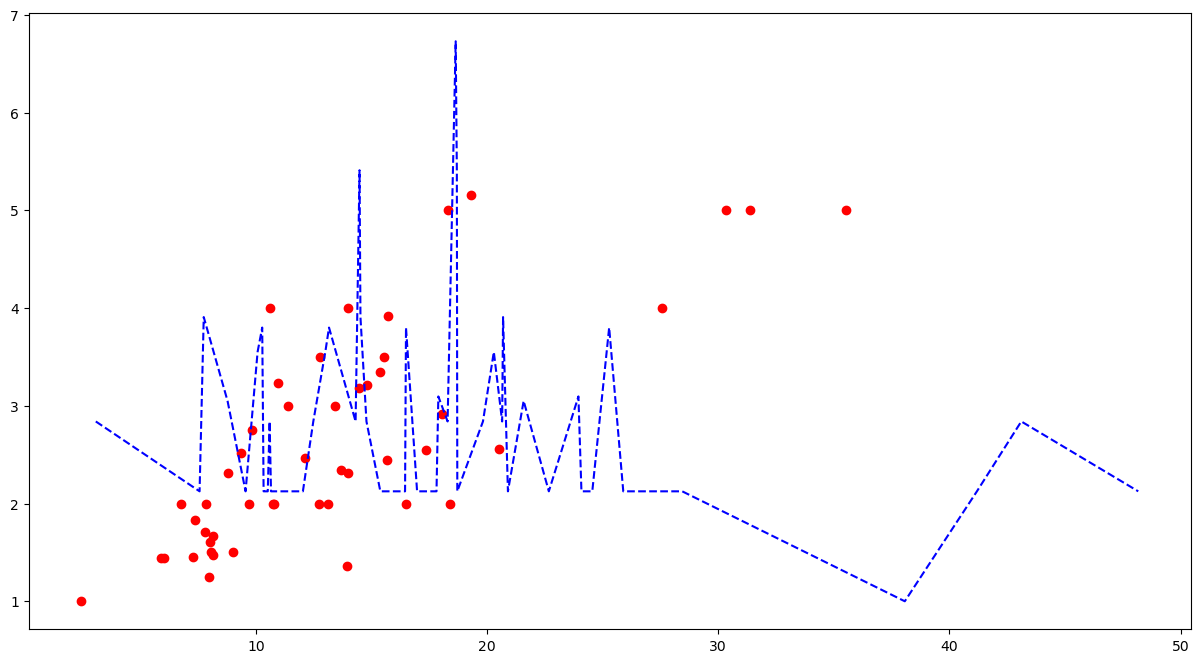

In [69]:

plt.figure(figsize=(15, 8))
plt.scatter(X_test, Y_test, color='red', label='Actual data')

plt.plot(x_test_sorted.iloc[:, 0], y_pred_tree, label='Decision Tree Regressor', color='blue',linestyle='--')
plt.plot(x_test_sorted.iloc[:, 0], y_pred_forest_sorted, label='Random Forest Regressor', color='orange', linewidth=2)
plt.plot(x_test_sorted.iloc[:, 0], y_pred_svr, label='Support Vector Regressor', color='brown',linestyle='--' )
plt.plot(x_test_sorted.iloc[:, 0], y_pred_knn, label='K Nearest Neighbour', color='pink',linestyle='--' )
plt.xlabel("X_data")
plt.ylabel("Tip")
plt.legend()
plt.title("Random Forest Regressor:Curve for Actual vs Predicted Values")
plt.show()


## 8: Rainbow testing

In [70]:
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

# Define the models to evaluate
linear_models = [("Linear Regression", model), ("Ridge Regression", ridge_reg), ("Lasso Regression", lasso_reg),("Decision Tree Regressor", tree_reg),
    ("Random Forest Regressor", forest_reg),
    ("Support Vector Regressor", svr_reg),
    ("k-NN Regressor", knn_reg)]

# Fit a linear regression model and apply the Rainbow Test to check linearity
for name, model in linear_models:
    # Add constant to feature matrix for statsmodels
    X_with_const = sm.add_constant(X)
    
    # Fit the model using OLS for the Rainbow Test
    linear_model = sm.OLS(y, X_with_const).fit()
    rainbow_statistic, rainbow_p_value = linear_rainbow(linear_model)
    
    # Print results
    print(f"{name} - Rainbow Test p-value: {rainbow_p_value}")
    if rainbow_p_value > 0.05:
        print(f"Fail to reject the null hypothesis for {name}: data likely follows a linear trend.\n")
    else:
        print(f"Reject the null hypothesis for {name}: data may not follow a linear trend.\n")


Linear Regression - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Linear Regression: data likely follows a linear trend.

Ridge Regression - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Ridge Regression: data likely follows a linear trend.

Lasso Regression - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Lasso Regression: data likely follows a linear trend.

Decision Tree Regressor - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Decision Tree Regressor: data likely follows a linear trend.

Random Forest Regressor - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Random Forest Regressor: data likely follows a linear trend.

Support Vector Regressor - Rainbow Test p-value: 0.1363162355448987
Fail to reject the null hypothesis for Support Vector Regressor: data likely follows a linear trend.

k-NN Regressor - Rainbow Test 

## Residual Plots

Evaluating Linear Regression:


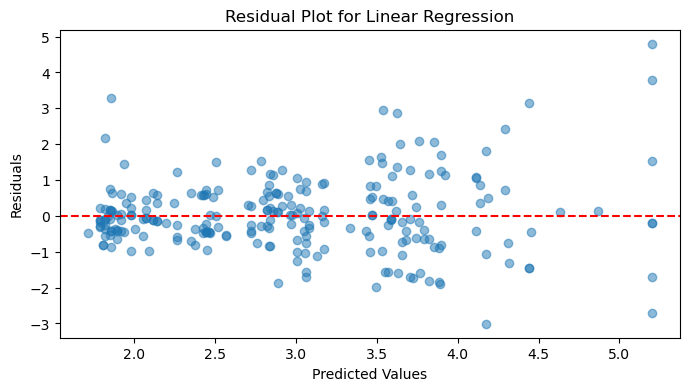

Evaluating Ridge Regression:


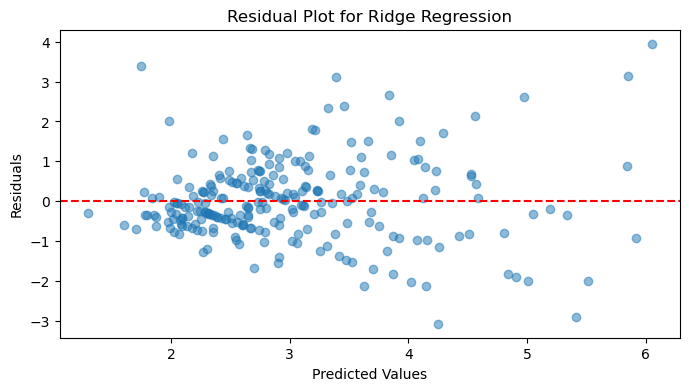

Evaluating Lasso Regression:


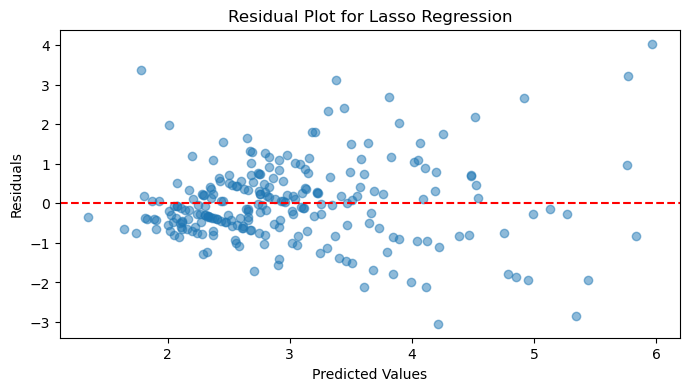

Evaluating Decision Tree Regressor:


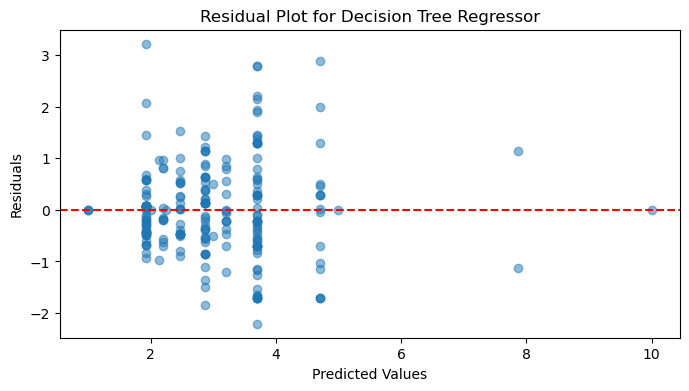

Evaluating Random Forest Regressor:


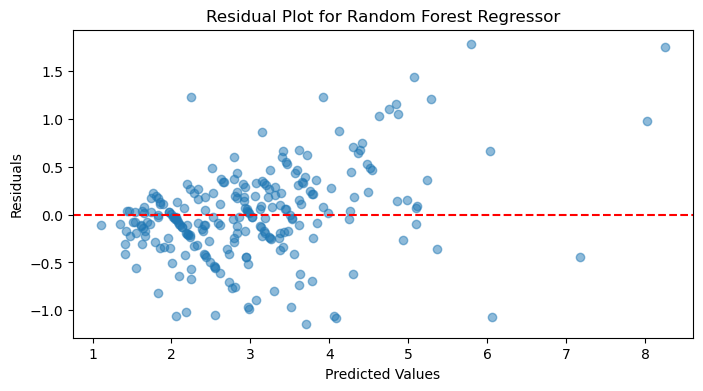

Evaluating Support Vector Regressor:


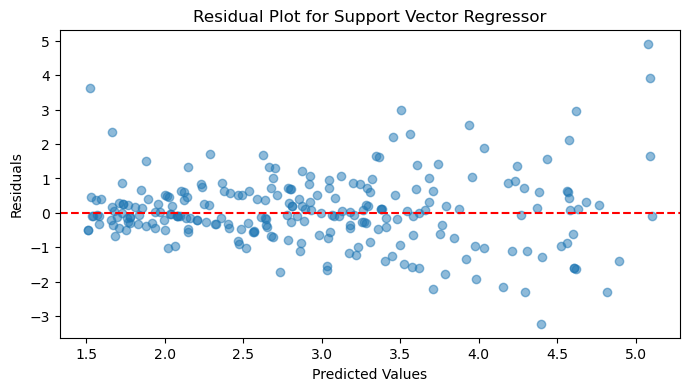

Evaluating k-NN Regressor:


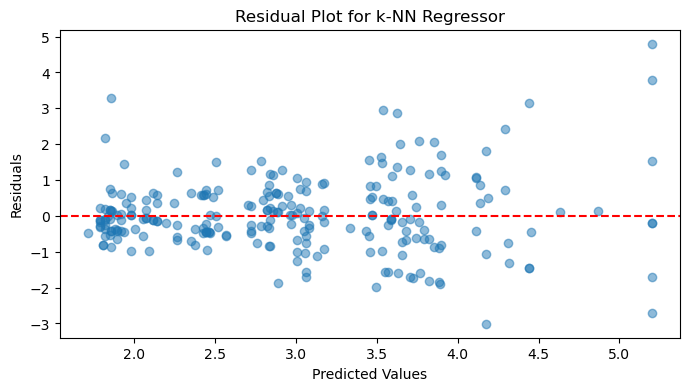

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# List of models to evaluate
models = [
    ("Linear Regression", model),
    ("Ridge Regression", ridge_reg),
    ("Lasso Regression", lasso_reg),
    ("Decision Tree Regressor", tree_reg),
    ("Random Forest Regressor", forest_reg),
    ("Support Vector Regressor", svr_reg),
    ("k-NN Regressor", knn_reg)
]

# Iterate through each model
for name, model in models:
    print(f"Evaluating {name}:")
    
    # Fit the model
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Plot residuals
    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {name}')
    plt.show()
